In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import xarray as xr
from tqdm import tqdm
from scipy.constants import c
from interleaver_2_stages import interleaver_2_stage_calc, calculate_spectrum_bandwidth

In [2]:
gf45clo_pdk_sin_neff_ng_variability = xr.open_dataset("gf45clo_pdk_sin_neff_ng_variability.nc")
gf45clo_pdk_sin_neff_ng_variability

<xarray.Dataset>
Dimensions:                (num_samples: 500, wg_width_median_array: 3)
Coordinates:
  * num_samples            (num_samples) int32 0 1 2 3 4 ... 495 496 497 498 499
  * wg_width_median_array  (wg_width_median_array) float64 0.8 1.4 2.0
Data variables:
    wg_width               (wg_width_median_array, num_samples) float64 ...
    wg_height              (wg_width_median_array, num_samples) float64 ...
    wg_sidewall_angle      (wg_width_median_array, num_samples) float64 ...
    wg_width_median        (wg_width_median_array, num_samples) float64 ...
    neff_freq0             (wg_width_median_array, num_samples) float32 ...
    neff_dfreq             (wg_width_median_array, num_samples) float64 ...
    ng_freq0               (wg_width_median_array, num_samples) float32 ...
    ng_dfreq               (wg_width_median_array, num_samples) float64 ...
Attributes:
    description:  gf45clo_pdk_sin_neff_ng_variability

In [3]:
XPS_first_stage_loss_dB   = 0.07
XPS_second_stage_loss_dB  = 0.07
XPS_third_stage_loss_dB   = 0.07
SiN_propagation_loss_dB_m = 40
SiN_directional_coupler_loss_dB = 0.02

SiN_group_index = []
SiN_effective_index = []
for width in gf45clo_pdk_sin_neff_ng_variability['wg_width_median_array'].values:
  SiN_group_index.append(np.median(gf45clo_pdk_sin_neff_ng_variability.sel(wg_width_median_array=width)['ng_freq0'].values))
  SiN_effective_index.append(np.median(gf45clo_pdk_sin_neff_ng_variability.sel(wg_width_median_array=width)['neff_freq0'].values))

center_wavelength = 1310e-9
freq = c/(center_wavelength)
FSR_wavelength = 1600e9 * (center_wavelength)**2/(c)
channel_spacing = FSR_wavelength/8
channel1_wavelength = center_wavelength - 3.5*channel_spacing
channel2_wavelength = center_wavelength - 2.5*channel_spacing
channel3_wavelength = center_wavelength - 1.5*channel_spacing
channel4_wavelength = center_wavelength - 0.5*channel_spacing
channel5_wavelength = center_wavelength + 0.5*channel_spacing
channel6_wavelength = center_wavelength + 1.5*channel_spacing
channel7_wavelength = center_wavelength + 2.5*channel_spacing
channel8_wavelength = center_wavelength + 3.5*channel_spacing
channel_wavelength_array = [
    channel1_wavelength,
    channel2_wavelength,
    channel3_wavelength,
    channel4_wavelength,
    channel5_wavelength,
    channel6_wavelength,
    channel7_wavelength,
    channel8_wavelength,
]

dL_400Ghz_FSR = []

for idd_width, width in enumerate(gf45clo_pdk_sin_neff_ng_variability['wg_width_median_array'].values):
  dL_400Ghz_FSR.append((center_wavelength)**2/(SiN_group_index[idd_width] * FSR_wavelength/4))

optimization_wavelength_sweep = np.linspace(1295e-9,1325e-9,num=4000)
cost_function_plot_alpha = 0.3
bounds_epsilon = 5e-3

In [4]:
num_sweep = len(gf45clo_pdk_sin_neff_ng_variability['num_samples'].values)
num_sweep = 20001

channel_offset_list = [0e9, 10e9, 20e9, 30e9, 40e9, 50e9, 60e9, 70e9]

random_variable_sigma = [0.02, 0.05, 0.1]

dc_variability = ["common"]
simulation = ["dc_variability"]

rand_dc1 = {}
rand_dc2 = {}
rand_dc3 = {}

for sigma in random_variable_sigma:
    rand_dc1[sigma] = 1+np.random.normal(0, sigma, num_sweep)
    rand_dc2[sigma] = 1+np.random.normal(0, sigma, num_sweep)
    rand_dc3[sigma] = 1+np.random.normal(0, sigma, num_sweep)

Idd_width:  0  Width:  0.8 um
dL for 400Ghz FSR:  0.0003879301671050113
  #      DC1        DC2        DC3       phi1      phi2       Cost
   0    0.500000    0.630000    0.900000    2.962271  0.200334  3405.784254
  10    0.501032    0.625232    0.895000    3.206125  0.216825  3171.715632
  20    0.499014    0.625147    0.895000    3.976899  0.208015  2845.103603
  30    0.497115    0.625000    0.895000    4.097191  0.222556  2839.337216
  40    0.499787    0.626275    0.896459    3.689995  0.254843  2846.415471
  50    0.497903    0.629707    0.903411    4.083943  0.413275  2613.052103
  60    0.502921    0.634962    0.904749    4.106955  0.966233  2059.078669
  70    0.505000    0.635000    0.904246    4.084346  2.494404  1231.138521
  80    0.503823    0.635000    0.904588    4.127532  1.773691  1375.146763
  90    0.503626    0.635000    0.904580    4.388537  2.540472  1065.053402
 100    0.502656    0.635000    0.904499    4.540896  2.693576  1067.981730
 110    0.502992    0.635

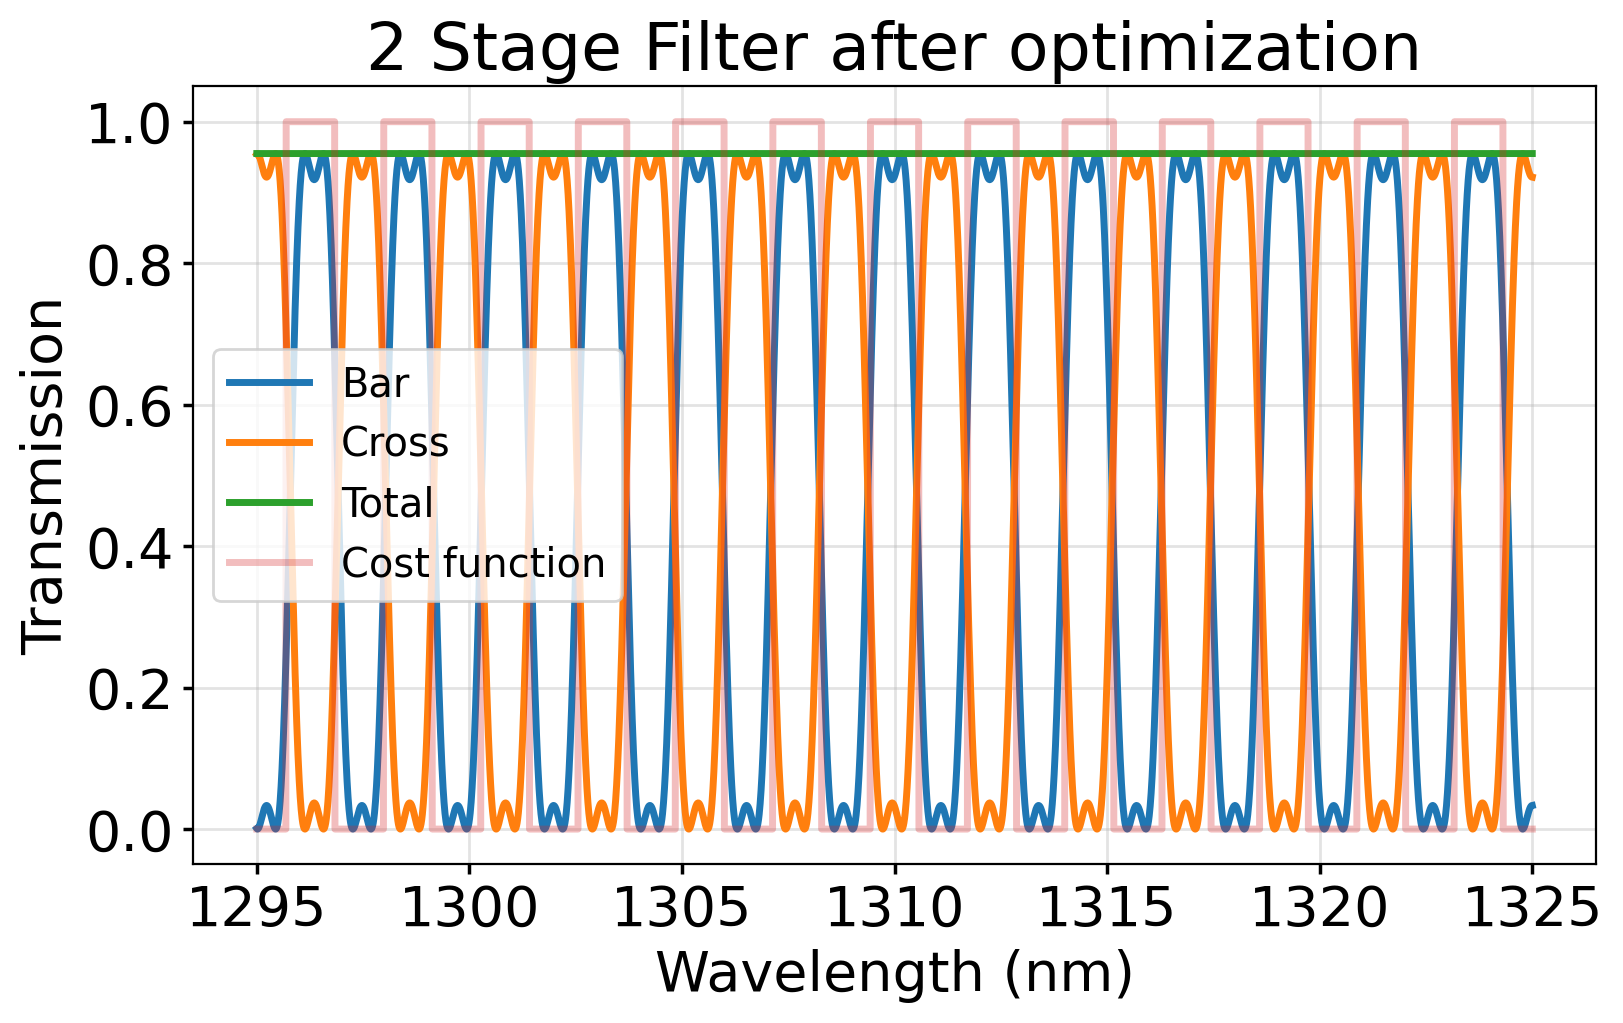

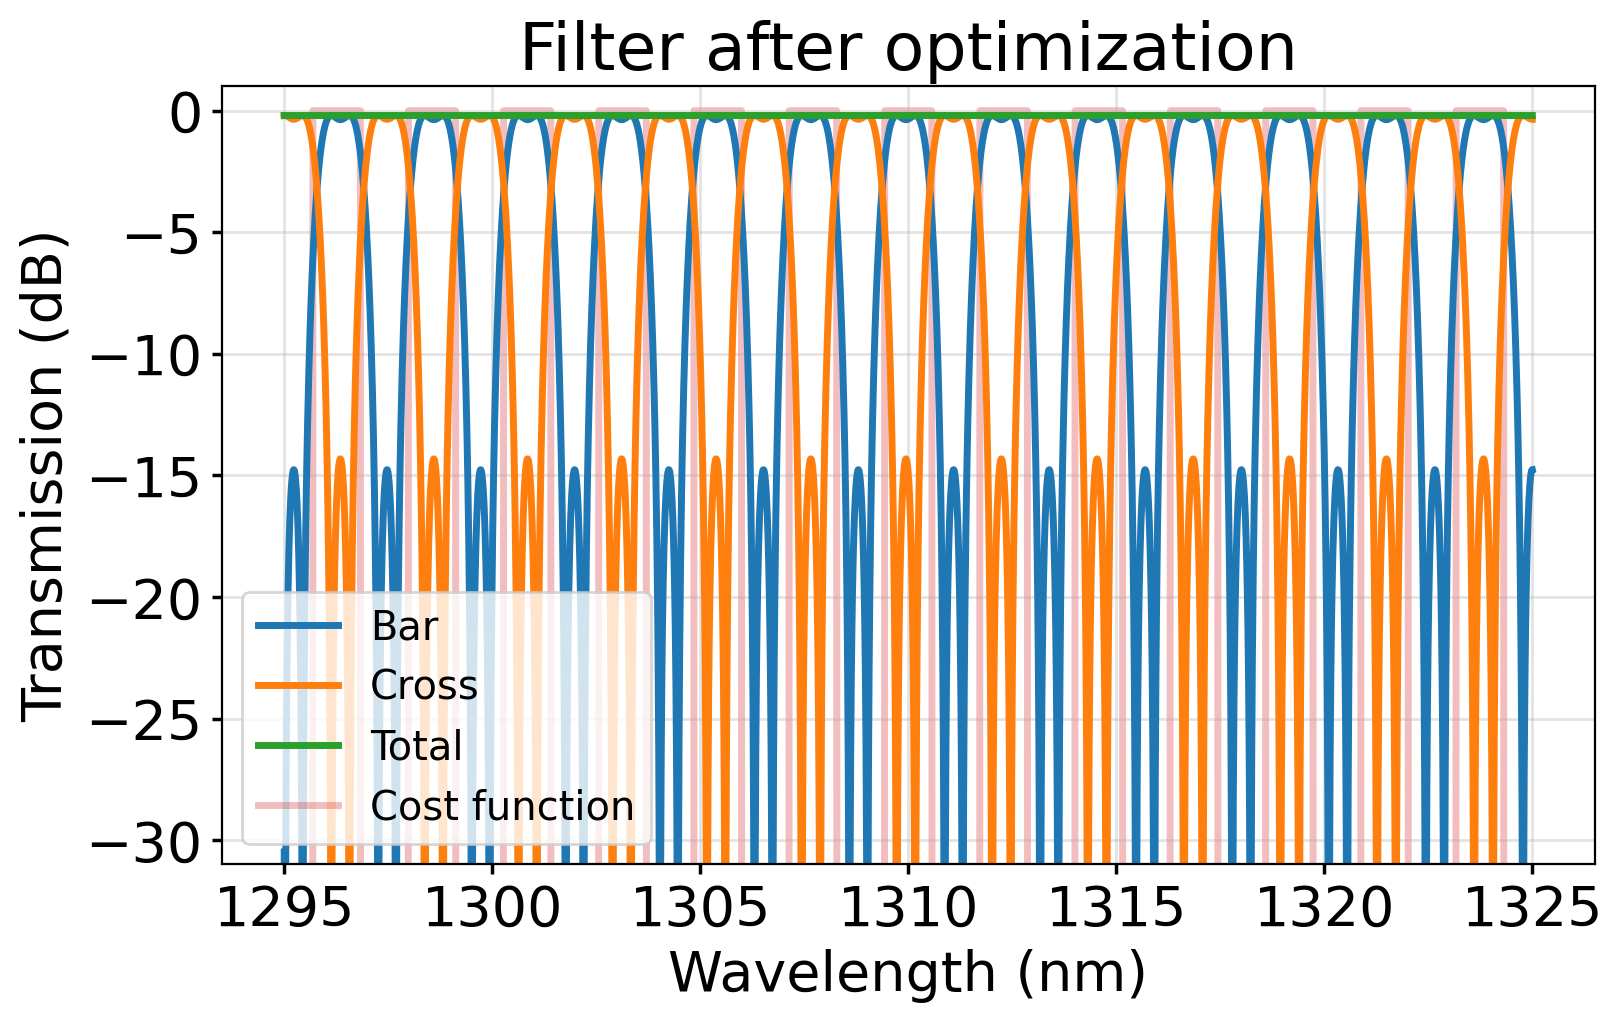

100%|██████████| 20001/20001 [5:42:10<00:00,  1.03s/it]  


Idd_width:  1  Width:  1.4 um
dL for 400Ghz FSR:  0.000383703057953536
  #      DC1        DC2        DC3       phi1      phi2       Cost
   0    0.500000    0.630000    0.900000   -1.054647  3.069073  6578.602055
  10    0.505000    0.635000    0.901472   -1.049922  2.828458  6389.431240
  20    0.498670    0.634315    0.905000   -1.031610  1.082564  4845.631791
  30    0.497998    0.634953    0.904539   -1.094853  0.306286  4806.724342
  40    0.499474    0.633349    0.905000   -1.079002  0.424255  4782.707276
  50    0.504102    0.634486    0.904961   -0.990646  0.491009  4736.880542
  60    0.504844    0.634532    0.905000   -0.691609  0.838436  4505.378021
  70    0.503835    0.633591    0.904848    0.715368  1.923823  2419.619776
  80    0.503229    0.632251    0.904822    1.293717  2.489078  1546.373877
  90    0.502607    0.631058    0.904802    1.876480  3.164690  1174.742607
 100    0.502965    0.631573    0.904760    1.532731  3.333393  1122.613633
 110    0.502799    0.6310

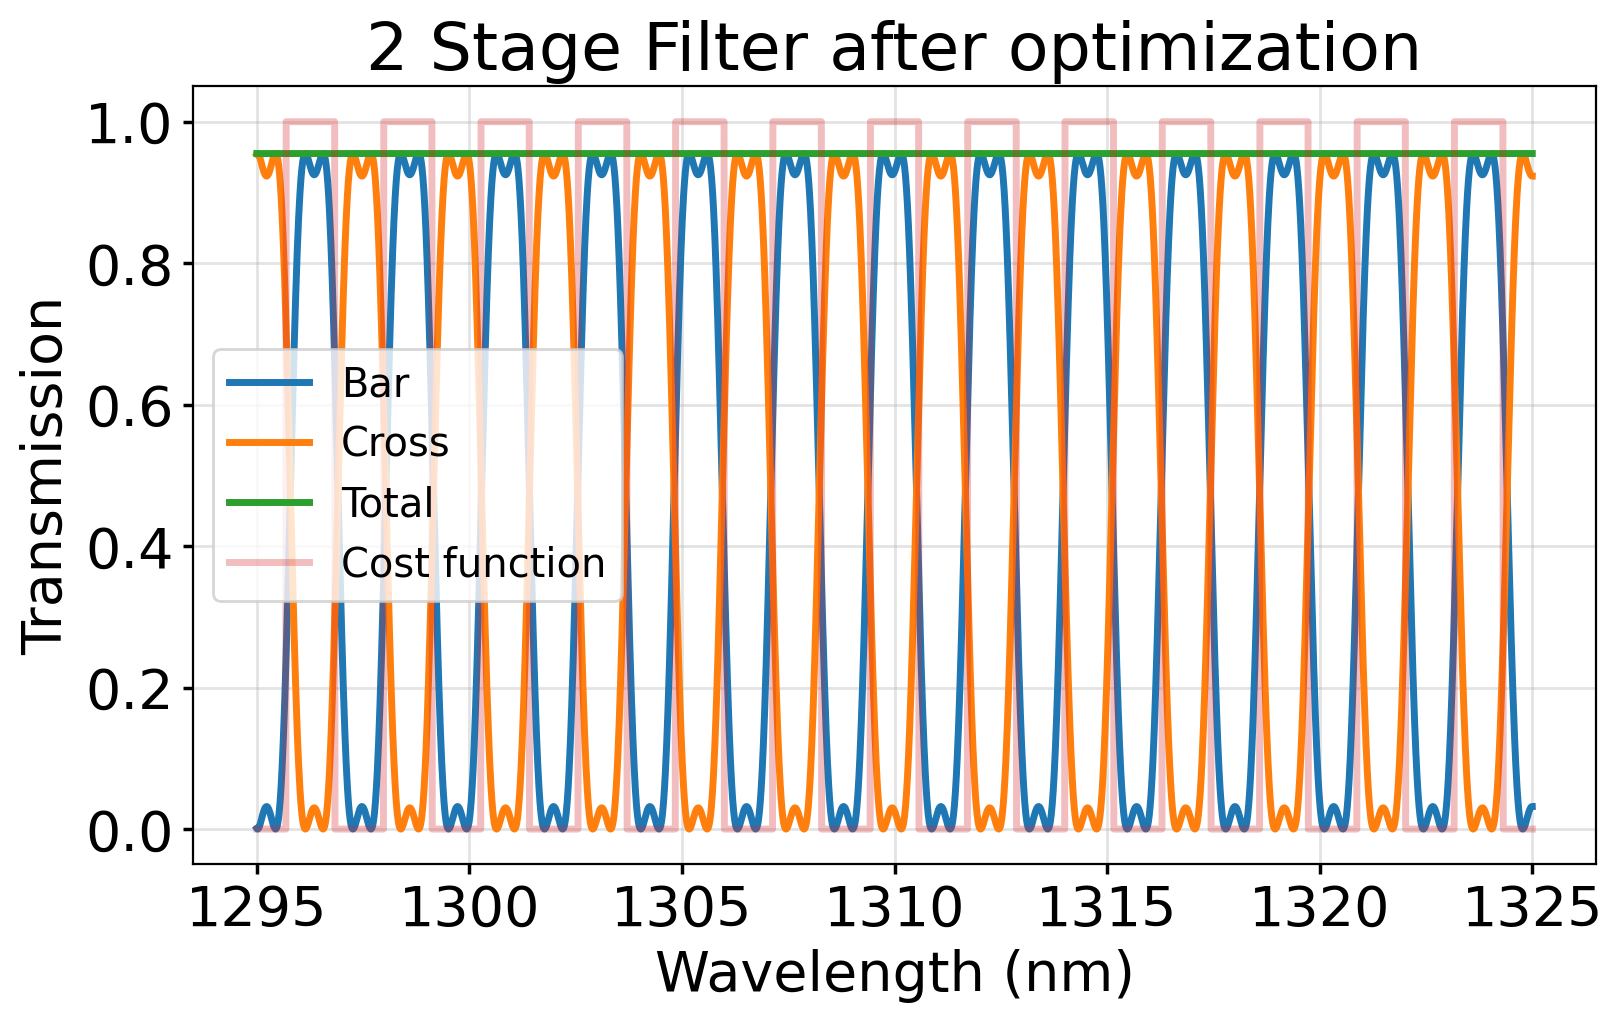

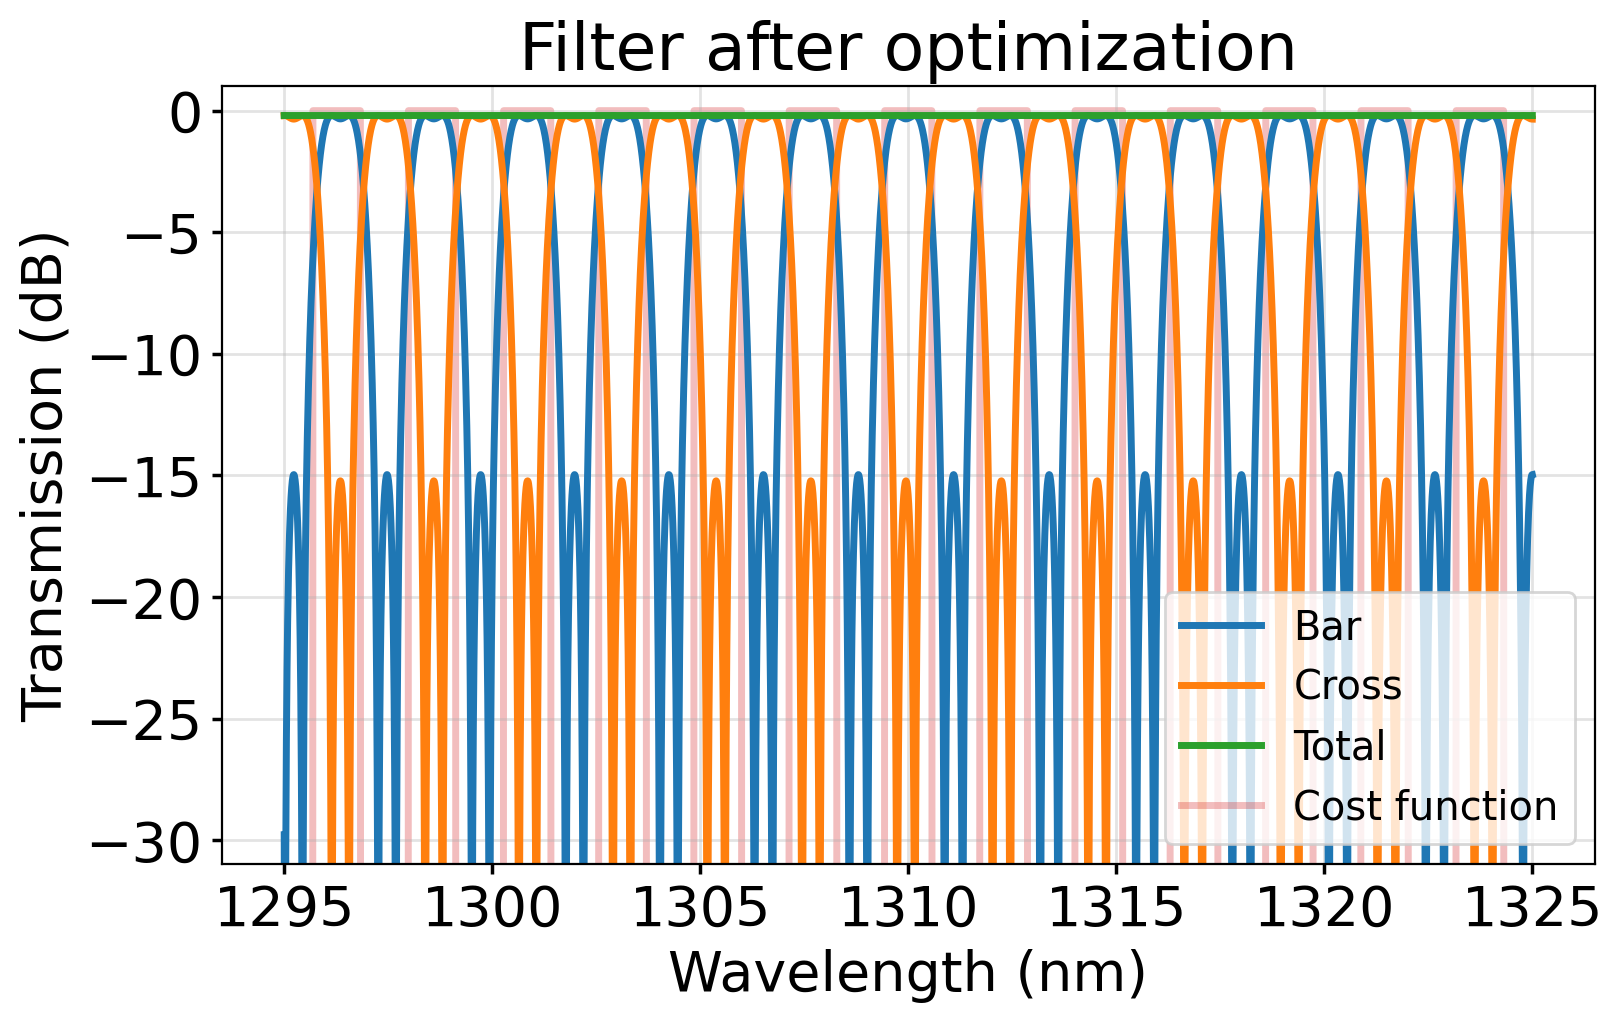

 63%|██████▎   | 12640/20001 [3:48:36<2:13:07,  1.09s/it]


KeyboardInterrupt: 

In [5]:
# Create compound effect of the three filter stages on top of each other

um = 1e-6

interleaver_dataset = {}

idd_interleaver = 1
um = 1e-6

for idd_width, width in enumerate(gf45clo_pdk_sin_neff_ng_variability['wg_width_median_array'].values):
    print("Idd_width: ", idd_width," Width: ", width, "um")
    print("dL for 400Ghz FSR: ", dL_400Ghz_FSR[idd_width])
    interleaver_400Ghz_FSR = interleaver_2_stage_calc(
        L = 350*um,
        dL1 = dL_400Ghz_FSR[idd_width],
        dL2 = 2*dL_400Ghz_FSR[idd_width],
        dc1 = 0.5,
        dc2 = 0.63,
        dc3 = 0.9,
        effective_index = SiN_effective_index[idd_width],
        group_index = SiN_group_index[idd_width],
        FSR_wavelength = FSR_wavelength,
        SiN_propagation_loss_dB_m = SiN_directional_coupler_loss_dB,
        XPS_first_stage_loss_dB = XPS_first_stage_loss_dB,
        SiN_directional_coupler_loss_dB = SiN_directional_coupler_loss_dB,
    )
    interleaver_400Ghz_FSR.channel_spacing = FSR_wavelength/8

    interleaver_400Ghz_result = interleaver_400Ghz_FSR.minimize_cost_function(random_dc=False,random_phase=True,printy=True)

    wav,bar_port_amp,cross_port_amp = interleaver_400Ghz_FSR.calculate_spectrum(*interleaver_400Ghz_result.x)

    print("First stage insertion loss (dB): ", np.max(10*np.log10(bar_port_amp)))

    interleaver_400Ghz_FSR.plot_spectrum(interleaver_400Ghz_result)


    for sim_mode in simulation:
        for dc_mode in dc_variability:
            for sigma in random_variable_sigma:
                for idd_rand in tqdm(range(num_sweep)):
                    interleaver_dc1 = rand_dc1[sigma][idd_rand] * interleaver_400Ghz_result.x[0]
                    interleaver_dc2 = rand_dc2[sigma][idd_rand] * interleaver_400Ghz_result.x[1]
                    interleaver_dc3 = rand_dc3[sigma][idd_rand] * interleaver_400Ghz_result.x[2]
                    if dc_mode == "common":
                        interleaver_dc2 = rand_dc1[sigma][idd_rand] * interleaver_400Ghz_result.x[1] * 0.90
                        interleaver_dc3 = rand_dc1[sigma][idd_rand] * interleaver_400Ghz_result.x[2] * 0.5

                    interleaver_dc1 = np.clip(interleaver_dc1, a_min=0, a_max=1)
                    interleaver_dc2 = np.clip(interleaver_dc2, a_min=0, a_max=1)
                    interleaver_dc3 = np.clip(interleaver_dc3, a_min=0, a_max=1)
                    if sim_mode == "montecarlo":
                        effective_index = gf45clo_pdk_sin_neff_ng_variability['neff_freq0'].sel(wg_width_median_array=width, num_samples=idd_rand).values
                        group_index = gf45clo_pdk_sin_neff_ng_variability['ng_freq0'].sel(wg_width_median_array=width, num_samples=idd_rand).values
                    else:
                        effective_index = SiN_effective_index[idd_width]
                        group_index = SiN_group_index[idd_width]

                    variation_interleaver = interleaver_2_stage_calc(
                        L=350*um,
                        dL1 = dL_400Ghz_FSR[idd_width],
                        dL2 = 2*dL_400Ghz_FSR[idd_width],
                        dc1 = interleaver_dc1,
                        dc2 = interleaver_dc2,
                        dc3 = interleaver_dc3,
                        effective_index = effective_index,
                        group_index = group_index,
                        FSR_wavelength = FSR_wavelength,
                        SiN_propagation_loss_dB_m = SiN_directional_coupler_loss_dB,
                        XPS_first_stage_loss_dB = XPS_first_stage_loss_dB,
                        SiN_directional_coupler_loss_dB = SiN_directional_coupler_loss_dB,
                    )
                    variation_interleaver.channel_spacing = FSR_wavelength/8

                    variation_interleaver.phase_shift_1_top = interleaver_400Ghz_result.x[3]
                    variation_interleaver.phase_shift_2_top = interleaver_400Ghz_result.x[4]

                    new_dev_params = [
                        interleaver_dc1,
                        interleaver_dc2,
                        interleaver_dc3,
                        interleaver_400Ghz_result.x[3],
                        interleaver_400Ghz_result.x[4],
                    ]

                    wav, bar_port_amp, cross_port_amp = variation_interleaver.calculate_spectrum(*new_dev_params)
                    bar_port_fom = calculate_spectrum_bandwidth(wav, bar_port_amp, IL_channel_offset = channel_offset_list, center_wavelength=center_wavelength)
                    cross_port_fom = calculate_spectrum_bandwidth(wav, bar_port_amp, IL_channel_offset = channel_offset_list, center_wavelength=center_wavelength)

                    interleaver_dataset[idd_interleaver] = {
                        "wg_width":np.median(gf45clo_pdk_sin_neff_ng_variability['wg_width'].sel(wg_width_median_array=width).values),
                        "wg_height":np.median(gf45clo_pdk_sin_neff_ng_variability['wg_height'].sel(wg_width_median_array=width).values),
                        "wg_sidewall_angle":np.median(gf45clo_pdk_sin_neff_ng_variability['wg_sidewall_angle'].sel(wg_width_median_array=width).values),
                        "neff":effective_index,
                        "ng":group_index,
                        "simulation_mode": sim_mode,
                        "dc_variability_mode":dc_mode,
                        "sigma":sigma,
                        "interleaver_dc1": interleaver_dc1,
                        "interleaver_dc2": interleaver_dc2,
                        "interleaver_dc3": interleaver_dc3,
                        "phase_shift_1_top": interleaver_400Ghz_result.x[3],
                        "phase_shift_2_top": interleaver_400Ghz_result.x[4],
                        "wav": wav,
                        "bar_port_amp": bar_port_amp,
                        "cross_port_amp": cross_port_amp,
                        "bar_port_fom": bar_port_fom,
                        "cross_port_fom": cross_port_fom
                    }

                    idd_interleaver += 1

In [9]:
bar_port_amp_xr = np.zeros((len(simulation), len(dc_variability), len(random_variable_sigma), num_sweep, 1, len(wav)))
cross_port_amp_xr = np.zeros((len(simulation), len(dc_variability), len(random_variable_sigma), num_sweep, 1, len(wav)))
bar_port_fom_xr = np.zeros((len(simulation), len(dc_variability), len(random_variable_sigma), num_sweep, 1, 7, 8))
cross_port_fom_xr = np.zeros((len(simulation), len(dc_variability), len(random_variable_sigma), num_sweep, 1, 7, 8))

wg_params_xr = np.zeros((len(simulation), 6, num_sweep))
dc_params_xr = np.zeros((len(simulation),len(random_variable_sigma), 3, num_sweep))
phase_params_xr = np.zeros((len(simulation),len(random_variable_sigma), 2, num_sweep))

wg_params = ["wg_width","wg_height","wg_sidewall_angle","wg_width_median_array","neff","ng"]
dc_params = ["dc1","dc2", "dc3"]
fom_params = ["1dB_bandwidth","channel_center_frequency","min_dc_il_bandwidth","rf_il_dB","min_dc_il_dB","ave_dc_il_dB","ripple_dc_il_dB"]
phase_shifter_params = ["phase_shift_1_top","phase_shift_2_top"]

for idd_sim_mode, sim_mode in enumerate(simulation):
    for idd_dc_mode, dc_mode in enumerate(dc_variability):
        for idd_sigma_mode,sigma in enumerate(random_variable_sigma):
            for idd_rand, num in enumerate(range(num_sweep)):
                # for idd_width, width in enumerate(np.array(gf45clo_pdk_sin_neff_ng_variability['wg_width_median_array'].values[0])):
                width = gf45clo_pdk_sin_neff_ng_variability['wg_width_median_array'].values[0]
                idd_width = 0
                idd_dict = idd_width * len(simulation)*len(dc_variability) * len(random_variable_sigma)*num_sweep + idd_sim_mode * len(dc_variability) * len(random_variable_sigma)* num_sweep + idd_dc_mode*len(random_variable_sigma) * num_sweep + idd_sigma_mode * num_sweep + idd_rand
                bar_port_amp_xr[idd_sim_mode][idd_dc_mode][idd_sigma_mode][idd_rand][idd_width][:] = interleaver_dataset[idd_dict+1]["bar_port_amp"]
                cross_port_amp_xr[idd_sim_mode][idd_dc_mode][idd_sigma_mode][idd_rand][idd_width][:] = interleaver_dataset[idd_dict+1]["cross_port_amp"]
                
                for idd_fom, fom_params_name in enumerate(fom_params):
                    bar_port_fom_xr[idd_sim_mode][idd_dc_mode][idd_sigma_mode][idd_rand][idd_width][idd_fom][:] = interleaver_dataset[idd_dict+1]["bar_port_fom"][fom_params_name].flatten()
                    cross_port_fom_xr[idd_sim_mode][idd_dc_mode][idd_sigma_mode][idd_rand][idd_width][idd_fom][:] = interleaver_dataset[idd_dict+1]["cross_port_fom"][fom_params_name].flatten()
                    
                
                for idd_wg_params, wg_params_name in enumerate(wg_params):
                    if wg_params_name == "wg_width_median_array":
                        wg_params_xr[idd_sim_mode][idd_wg_params][idd_rand] = width
                    else:
                        wg_params_xr[idd_sim_mode][idd_wg_params][idd_rand] = interleaver_dataset[idd_dict+1][wg_params_name]
                            
                for idd_dc_params, dc_params_name in enumerate(dc_params):
                    dc_params_xr[idd_sim_mode][idd_sigma_mode][idd_dc_params][idd_rand] = interleaver_dataset[idd_dict+1]["interleaver_"+dc_params_name]
                
                for idd_phase_params, phase_params_name in enumerate(phase_shifter_params):
                    phase_params_xr[idd_sim_mode][idd_sigma_mode][idd_phase_params][idd_rand] = interleaver_dataset[idd_dict+1][phase_params_name]

In [13]:
interleaver_2_stage_dataset = xr.Dataset(
    data_vars = dict(
        bar_port_amp = (["sim_mode","dc_variability_mode","dc_sigma","idd_rand","route_wg", "wavelength"], bar_port_amp_xr),
        cross_port_amp = (["sim_mode","dc_variability_mode","dc_sigma","idd_rand", "route_wg", "wavelength"], cross_port_amp_xr),
        bar_port_fom = (["sim_mode","dc_variability_mode","dc_sigma","idd_rand","route_wg", "fom_params","idd_fom"], bar_port_fom_xr),
        cross_port_fom = (["sim_mode","dc_variability_mode","dc_sigma","idd_rand", "route_wg", "fom_params","idd_fom"], cross_port_fom_xr),
        phase = (["sim_mode","dc_sigma","phase_params","idd_rand"], phase_params_xr),
        wg = (["sim_mode","wg_params","idd_rand"], wg_params_xr),
        dc = (["sim_mode","dc_sigma", "dc_params","idd_rand"], dc_params_xr)
    ),
    coords = dict(
        sim_mode = simulation,
        dc_variability_mode = dc_variability,
        dc_sigma = random_variable_sigma,
        idd_rand = range(num_sweep),
        route_wg = [gf45clo_pdk_sin_neff_ng_variability['wg_width_median_array'].values[0]],
        wavelength = wav,
        dc_params = dc_params,
        phase_params = phase_shifter_params,
        wg_params = wg_params,
        fom_params = fom_params,
        idd_fom = ["ch1", "ch2", "ch3", "ch4", "ch5", "ch6", "ch7", "ch8"],
        channel_offset = channel_offset_list
    ),
    attrs = dict(description = "Interleaver 2 stage data")
)

In [14]:
interleaver_2_stage_dataset

<xarray.Dataset>
Dimensions:              (sim_mode: 1, dc_variability_mode: 1, dc_sigma: 3,
                          idd_rand: 20001, route_wg: 1, wavelength: 4000,
                          fom_params: 7, idd_fom: 8, phase_params: 2,
                          wg_params: 6, dc_params: 3, channel_offset: 8)
Coordinates:
  * sim_mode             (sim_mode) <U14 'dc_variability'
  * dc_variability_mode  (dc_variability_mode) <U6 'common'
  * dc_sigma             (dc_sigma) float64 0.02 0.05 0.1
  * idd_rand             (idd_rand) int64 0 1 2 3 4 ... 19997 19998 19999 20000
  * route_wg             (route_wg) float64 0.8
  * wavelength           (wavelength) float64 1.295e-06 1.295e-06 ... 1.325e-06
  * dc_params            (dc_params) <U3 'dc1' 'dc2' 'dc3'
  * phase_params         (phase_params) <U17 'phase_shift_1_top' 'phase_shift...
  * wg_params            (wg_params) <U21 'wg_width' 'wg_height' ... 'neff' 'ng'
  * fom_params           (fom_params) <U24 '1dB_bandwidth' ... 'ripple_dc_il_dB'
  * idd_fom              (idd_fom) <U3 'ch1' 'ch2' 'ch3' ... 'ch6' 'ch7' 'ch8'
  * channel_offset       (channel_offset) float64 0.0 1e+10 ... 6e+10 7e+10
Data variables:
    bar_port_amp         (sim_mode, dc_variability_mode, dc_sigma, idd_rand, route_wg, wavelength) float64 ...
    cross_port_amp       (sim_mode, dc_variability_mode, dc_sigma, idd_rand, route_wg, wavelength) float64 ...
    bar_port_fom         (sim_mode, dc_variability_mode, dc_sigma, idd_rand, route_wg, fom_params, idd_fom) float64 ...
    cross_port_fom       (sim_mode, dc_variability_mode, dc_sigma, idd_rand, route_wg, fom_params, idd_fom) float64 ...
    phase                (sim_mode, dc_sigma, phase_params, idd_rand) float64 ...
    wg                   (sim_mode, wg_params, idd_rand) float64 0.8004 ... 1...
    dc                   (sim_mode, dc_sigma, dc_params, idd_rand) float64 0....
Attributes:
    description:  Interleaver 2 stage data

In [15]:
interleaver_2_stage_dataset.to_netcdf("interleaver_2_stage_dataset_20240109.nc")